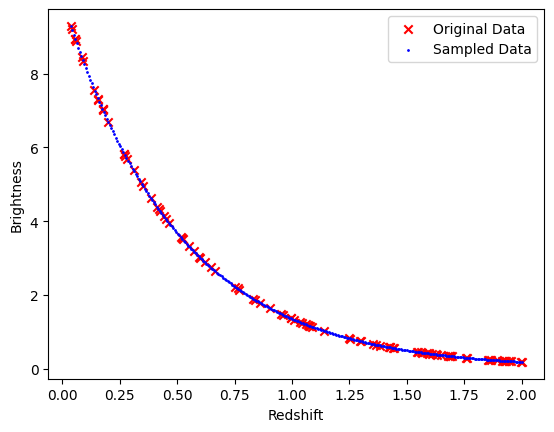

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def sample_from_distribution(redshifts, brightness_scale, rate, n):
    """
    Generate a set of brightness values based on an exponential distribution
    and fit the data to an exponential curve to sample new data points.
    
    Parameters:
    redshifts (array_like): Array of redshift values to base the distribution on.
    brightness_scale (float): Scaling factor for the brightness values.
    rate (float): Rate parameter for the exponential distribution.
    n (int): Number of data points to sample from the fitted curve.
    
    Returns:
    tuple: Tuple containing:
        - sampled_redshifts (ndarray): An array of redshift values sampled from the fitted curve.
        - sampled_brightness (ndarray): An array of brightness values sampled from the fitted curve.
    """
    
    # Generate brightness values using exponential distribution
    brightness = brightness_scale * np.exp(-rate * redshifts)
    
    # Fit the data to an exponential curve
    def exponential_func(x, a, b):
        return a * np.exp(-b * x)
    
    popt, _ = curve_fit(exponential_func, redshifts, brightness)
    
    # Sample from the fitted exponential curve
    sampled_redshifts = np.linspace(min(redshifts), max(redshifts), n)
    sampled_brightness = exponential_func(sampled_redshifts, *popt)
    # Plot the sampled data
   
    plt.scatter(redshifts, brightness, label='Original Data', color='r', marker='x')
    plt.scatter(sampled_redshifts, sampled_brightness, label='Sampled Data', marker='o', color='b', s=1)
    plt.xlabel('Redshift')
    plt.ylabel('Brightness')
    plt.legend()
    plt.show()
    
    return sampled_redshifts, sampled_brightness

# Generate some random redshifts
redshifts = np.random.uniform(0, 2, 100)
# Call the function to generate data and sample from it
sampled_redshifts, sampled_brightness = sample_from_distribution(redshifts, brightness_scale=10, rate=2, n=300)

